# **20230619**

## 16장 이미지 인식의 꽃, 컨볼루션 신경망(CNN)

### 01 이미지를 인식하는 원리

In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt
import numpy as np
import sys

In [2]:
(X_train, y_train),(X_test, y_test) = mnist.load_data()

In [3]:
print('학습셋 이미지 수 : %d개' %(X_train.shape[0]))
print('테스트셋 이미지 수 : %d개' %(X_test.shape[0]))

학습셋 이미지 수 : 60000개
테스트셋 이미지 수 : 10000개


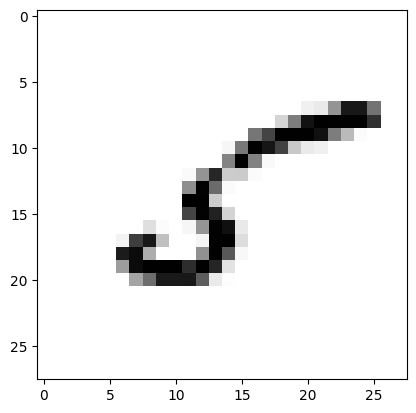

In [4]:
plt.imshow(X_train[11], cmap='Greys')
plt.show()

In [5]:
for x in X_train[0]:
    for i in x:
        sys.stdout.write('%-3s'%i)
    sys.stdout.write('\n')

0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  3  18 18 18 12613617526 1662552471270  0  0  0  
0  0  0  0  0  0  0  0  30 36 94 15417025325325325325322517225324219564 0  0  0  0  
0  0  0  0  0  0  0  49 23825325325325325325325325325193 82 82 56 39 0  0  0  0  0  
0  0  0  0  0  0  0  18 2192532532532532531981822472410  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  80 15610725325320511 0  43 1540  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  14 1  15425390 0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  1392531902  0  0  0  0  0  0  0 

In [6]:
X_train.shape, X_train.shape[0]

((60000, 28, 28), 60000)

In [7]:
# 28 * 28 = 784
# 3차원 => 2차원

X_train = X_train.reshape(X_train.shape[0], 784)

In [8]:
X_train.shape[1]

784

In [9]:
X_train = X_train.astype('float64')
# data : 0~225 사이 값 
X_train = X_train / 255 # => minmaxscaler와 같은 효과

In [10]:
X_test = X_test.reshape(X_test.shape[0], 784).astype('float64')/255

In [11]:
print('class : %d'%(y_train[0]))

class : 5


In [12]:
# to_categorical(): 원핫인코딩
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

In [13]:
print(y_train[0])   # 5

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


### 02 딥러닝 기본 프레임 만들기

In [14]:
from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [15]:
model = Sequential()
model.add(Dense(512, input_dim=X_train.shape[1],activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

In [17]:
modelpath='../data/model/MNIST_CNN.hdf5'
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss',verbose=1,save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss',patience=10)

In [18]:
history = model.fit(X_train,y_train, validation_split=0.25
                    ,epochs=30, batch_size=200,verbose=0
                    ,callbacks=[early_stopping_callback,checkpointer])

print('\n Test Accuracy: %.4f'%(model.evaluate(X_test,y_test)[1]))


Epoch 1: val_loss improved from inf to 0.18351, saving model to ../data/model\MNIST_CNN.hdf5

Epoch 2: val_loss improved from 0.18351 to 0.13796, saving model to ../data/model\MNIST_CNN.hdf5

Epoch 3: val_loss improved from 0.13796 to 0.11011, saving model to ../data/model\MNIST_CNN.hdf5

Epoch 4: val_loss improved from 0.11011 to 0.10533, saving model to ../data/model\MNIST_CNN.hdf5

Epoch 5: val_loss improved from 0.10533 to 0.09206, saving model to ../data/model\MNIST_CNN.hdf5

Epoch 6: val_loss improved from 0.09206 to 0.09047, saving model to ../data/model\MNIST_CNN.hdf5

Epoch 7: val_loss improved from 0.09047 to 0.08570, saving model to ../data/model\MNIST_CNN.hdf5

Epoch 8: val_loss did not improve from 0.08570

Epoch 9: val_loss improved from 0.08570 to 0.08533, saving model to ../data/model\MNIST_CNN.hdf5

Epoch 10: val_loss improved from 0.08533 to 0.08280, saving model to ../data/model\MNIST_CNN.hdf5

Epoch 11: val_loss did not improve from 0.08280

Epoch 12: val_loss did 

#### 학습셋 오차 그래프

In [19]:
y_vloss = history.history['val_loss']

y_loss = history.history['loss']

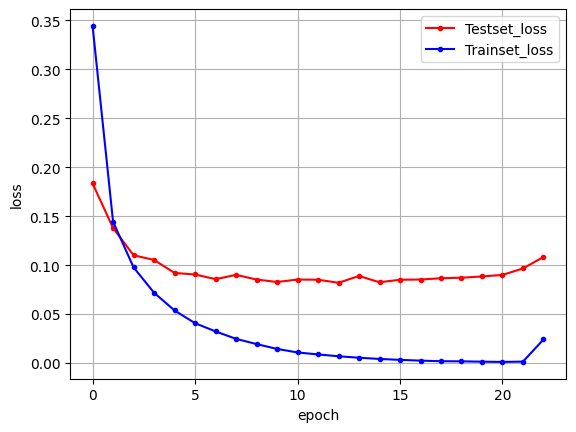

In [20]:
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c='red',label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c='blue',label='Trainset_loss')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

### 03 컨볼루션 신경망(CNN)

: 입력된 이미지에서 다시 한 번 **특징을 추출**하기 위해 커널(슬라이딩 윈도)을 도입하는 기법

- **커널에 가중치(w) 부여** (임의의 값으로 시작)

- 하나의 커널로 이미지 하나 처리

$\Rightarrow$ **원본 이미지 압축 , 특징 추출**

<br>

$\begin{pmatrix} 1 & 0 & 1 & 0 \\ 0 & 1 & 1 & 0 \\ 0 & 0 & 1 & 1 \\ 0 & 0 & 1 & 0 \end{pmatrix} $

위의 값을 가진 이미지에 2x2 커널 가중치 부여(내적x, 요소별 연산)


ex)

$ \begin{pmatrix} 1 & 0 \\ 0 & 1 \end{pmatrix} * \begin{pmatrix} w_1 & w_2 \\ w_3 & w_4 \end{pmatrix} = w_1 * 1 + w_2 * 0 + w_3 * 0 + w_4 * 1 $

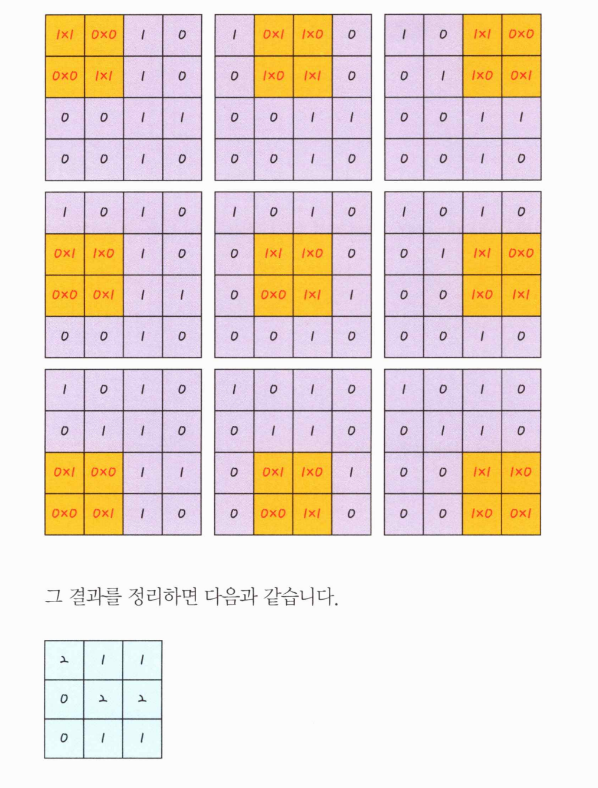

In [21]:
from IPython.display import Image
Image('./ch16_cnn.png')

#### CNN 커널

- 위와 같이 새롭게 만들어진 층을 **컨볼루션(합성곱) 층** 이라고한다.

- 커널의 개수에 따라 이에 맞게 컨볼루션 층이 만들어짐

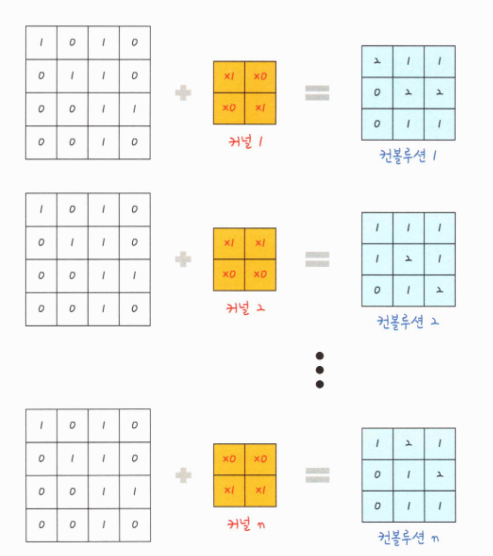

In [22]:
Image('./ch16_컨볼루션층.png')

#### Conv2D() :keras에서 컨볼루션 층을 추가하는 함수

```python

model.add(Conv2D(

      32                        # 결과 노드의 개수
    , kernal_size=(n,n)         # 커널의 모양 => 크기가 커지면 이미지 뭉개짐
    , input_shape=(wide, height, channel) 
     # 입력 이미지 차원         (channel=color(1:흑백(0~255), 3:컬러))
    , activation = '활성화함수'
    , strides = (1,1) :default   # 커널 이동 칸 수 지정
    , padding = 'valid' :default # 이미지 가장자리는 학습에서 소외될 수 있음 => 바깥 여백 추가:'same' (=strides 설정에 맞게 자동 설정)
    
    ))

```

Conv2D -> Flatten -> Dense -> 출력Dense

In [26]:
Conv2D?

Init signature:
Conv2D(
    filters,
    kernel_size,
    strides=(1, 1),
    padding='valid',
    data_format=None,
    dilation_rate=(1, 1),
    groups=1,
    activation=None,
    use_bias=True,
    kernel_initializer='glorot_uniform',
    bias_initializer='zeros',
    kernel_regularizer=None,
    bias_regularizer=None,
    activity_regularizer=None,
    kernel_constraint=None,
    bias_constraint=None,
    **kwargs,
)
Docstring:     
2D convolution layer (e.g. spatial convolution over images).

This layer creates a convolution kernel that is convolved
with the layer input to produce a tensor of
outputs. If `use_bias` is True,
a bias vector is created and added to the outputs. Finally, if
`activation` is not `None`, it is applied to the outputs as well.

When using this layer as the first layer in a model,
provide the keyword argument `input_shape`
(tuple of integers or `None`, does not include the sample axis),
e.g. `input_shape=(128, 128, 3)` for 128x128 RGB pictures
in `data_forma

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical


import matplotlib.pyplot as plt
import numpy as np


import os


# 데이터를 불러옵니다.
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


# 컨볼루션 신경망의 설정

model = Sequential()

# 입력층
model.add(Conv2D(32, kernel_size=(3, 3)
                 , input_shape=(28, 28, 1) #(행, 열, 1:흑백/3:컬러)
                 , activation='relu' # 흑백은 0~255 사이의 값을 가짐 => relu가 유용
                 ))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128,  activation='relu'))
model.add(Dropout(0.5))

# 출력층
model.add(Dense(10, activation='softmax'))


# 모델의 실행 옵션을 설정합니다.
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


# 모델 최적화를 위한 설정 구간입니다.
MODEL_DIR = '../data/model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)


modelpath="../data/model/MNIST_CNN.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)


# 모델을 실행합니다.
history = model.fit(X_train, y_train, validation_split=0.25, epochs=30, batch_size=200, verbose=0, callbacks=[early_stopping_callback,checkpointer])


# 테스트 정확도를 출력합니다.
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, y_test)[1]))



Epoch 1: val_loss improved from inf to 0.07448, saving model to ../data/model\MNIST_CNN.hdf5

Epoch 2: val_loss improved from 0.07448 to 0.05746, saving model to ../data/model\MNIST_CNN.hdf5

Epoch 3: val_loss improved from 0.05746 to 0.05482, saving model to ../data/model\MNIST_CNN.hdf5

Epoch 4: val_loss improved from 0.05482 to 0.04898, saving model to ../data/model\MNIST_CNN.hdf5

Epoch 5: val_loss improved from 0.04898 to 0.04552, saving model to ../data/model\MNIST_CNN.hdf5

Epoch 6: val_loss improved from 0.04552 to 0.04287, saving model to ../data/model\MNIST_CNN.hdf5

Epoch 7: val_loss improved from 0.04287 to 0.04057, saving model to ../data/model\MNIST_CNN.hdf5

Epoch 8: val_loss did not improve from 0.04057

Epoch 9: val_loss did not improve from 0.04057

Epoch 10: val_loss did not improve from 0.04057

Epoch 11: val_loss did not improve from 0.04057

Epoch 12: val_loss improved from 0.04057 to 0.03898, saving model to ../data/model\MNIST_CNN.hdf5

Epoch 13: val_loss did n

### 04 맥스 풀링, 드롭아웃, 플래튼


#### 맥스 풀링, 드롭 아웃 =>  과적합 방지용


- 이미지에서의 과적합 : 정확한 형태의 모양만 인식 가능한 모델이 만들어짐 <br>
(ex: 한 입 먹은 사과는 사과로 분류하지 못 함)

##### 맥스 풀링(MaxPooling)

: 2D 이미지의 **최대값만 추출** => return 2D


- 세밀하게 뽑혀져 있는 이미지 부분들의 특징을 ***뭉갬***


```python
MaxPooling2D( pool_size=(n,n) # 모자이크의 크기
            )
```


- 보통 kernel_size를 작게, pool_size를 크게해서 과적합 방지함 

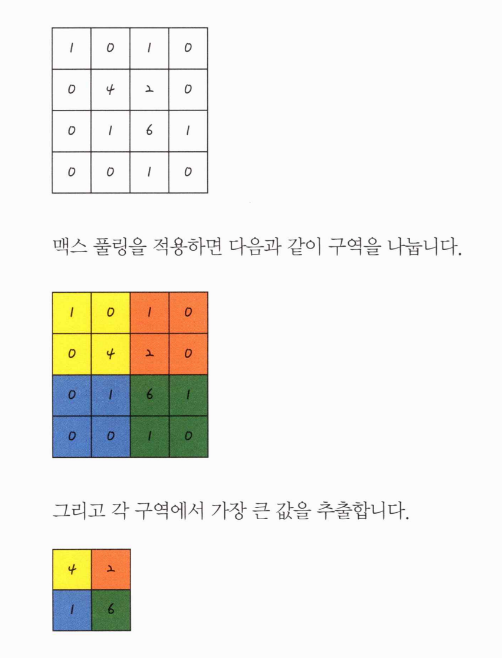

In [24]:
Image('./ch16_maxpooling.png')

##### 드롭 아웃(Dropout)

- 부여된 weight들 랜덤하게 삭제(몇개 삭제할 지 지정 필요)


#### 플래튼(Flatten) : 2D -> 1D

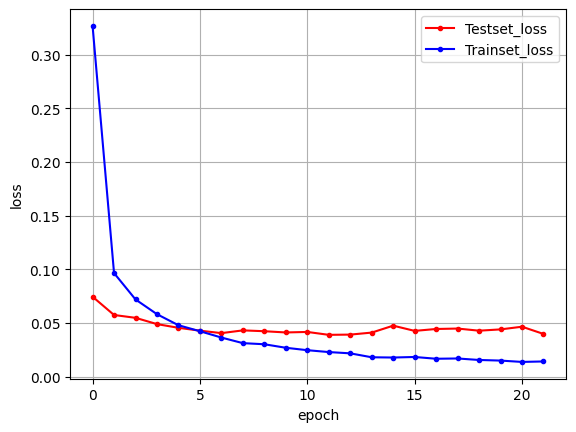

In [25]:
# 검증셋과 학습셋의 오차를 저장합니다.
y_vloss = history.history['val_loss']
y_loss = history.history['loss']


# 그래프로 표현해 봅니다.
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')


# 그래프에 그리드를 주고 레이블을 표시하겠습니다.
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()